In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Transformation
### Loading Data 

In [2]:
# The stocks we'll use for this analysis
stock_list = ['AMZN', 'GOOGL', 'MSFT', 'NFLX']

#For loop for grabing individual stock data and setting as a dataframe
for stock in stock_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pd.read_csv(f'{stock}.csv')

In [3]:
# Data can also be taken from yahoo through pandas_datareader

### Creating Data Frame

In [4]:
# making a list for comapnies to join the data with each other to make a dataframe
company_list = [AMZN, GOOGL, MSFT, NFLX]
company_name = ["AMAZON", "GOOGLE", "MICROSOFT", "NETFLIX"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    company = company.set_index("date")

# joining the data for stock name to the dataframe (concatenation)
df = pd.concat(company_list, axis=0)
df = df.set_index("date")

# to check 
df.tail(5)

,open,high,low,close,volume,Name,company_name
date,,,,,,,
2018-02-01,266.41,271.950,263.380,265.07,9669011,NFLX,NETFLIX
2018-02-02,263.00,270.620,262.710,267.43,9123610,NFLX,NETFLIX
2018-02-05,262.00,267.899,250.030,254.26,11896053,NFLX,NETFLIX
2018-02-06,247.70,266.700,245.000,265.72,12595801,NFLX,NETFLIX
2018-02-07,266.58,272.450,264.325,264.56,8981548,NFLX,NETFLIX


In [5]:
df.shape

(5036, 7)

In [6]:
# building a data frame with only the closing prices of all 4 stocks
data = [AMZN["date"], AMZN["close"], GOOGL["close"], MSFT["close"], NFLX["close"]]
headers = ["Date", "AMAZON", "GOOGLE", "MICROSOFT", "NETFLIX"]
closing_df = pd.concat(data, axis=1, keys=headers)
closing_df = closing_df.set_index("Date")
closing_df.tail(5)

,AMAZON,GOOGLE,MICROSOFT,NETFLIX
Date,,,,
2018-02-01,1390.00,1181.59,94.26,265.07
2018-02-02,1429.95,1119.20,91.78,267.43
2018-02-05,1390.00,1062.39,88.00,254.26
2018-02-06,1442.84,1084.43,91.33,265.72
2018-02-07,1416.78,1055.41,89.61,264.56


In [7]:
# creating a dataframe for daily return of stocks with the closing price dataframe 
# using the pct_change() to calculate percent change with respect to previous close
returns_df = closing_df.pct_change()
returns_df.tail(5)

,AMAZON,GOOGLE,MICROSOFT,NETFLIX
Date,,,,
2018-02-01,-0.041967,-0.000533,-0.007894,-0.019349
2018-02-02,0.028741,-0.052802,-0.026310,0.008903
2018-02-05,-0.027938,-0.050759,-0.041185,-0.049247
2018-02-06,0.038014,0.020746,0.037841,0.045072
2018-02-07,-0.018062,-0.026761,-0.018833,-0.004365


# Data Cleaning

In [8]:
# to check for missing data and number of values in the dataset
AMZN.info()
GOOGL.info()
MSFT.info()
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1259 non-null   object 
 1   open          1259 non-null   float64
 2   high          1259 non-null   float64
 3   low           1259 non-null   float64
 4   close         1259 non-null   float64
 5   volume        1259 non-null   int64  
 6   Name          1259 non-null   object 
 7   company_name  1259 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 78.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1259 non-null   object 
 1   open          1259 non-null   float64
 2   high          1259 non-null   float64
 3   low           1259 non-null   float64
 4   close         1259 non-null   fl

In [9]:
# to check if there are any NaN
df.isna().any()

open            False
high            False
low             False
close           False
volume          False
Name            False
company_name    False
dtype: bool

In [10]:
df.isna().sum()

open            0
high            0
low             0
close           0
volume          0
Name            0
company_name    0
dtype: int64

In [11]:
# As there is no missing or null data and all the columns have equal number of values,
# there is no need for cleaning of data

In [12]:
closing_df.isna().any()

AMAZON       False
GOOGLE       False
MICROSOFT    False
NETFLIX      False
dtype: bool

# Data Visualization

## 1. Change in stock price over the period of time.

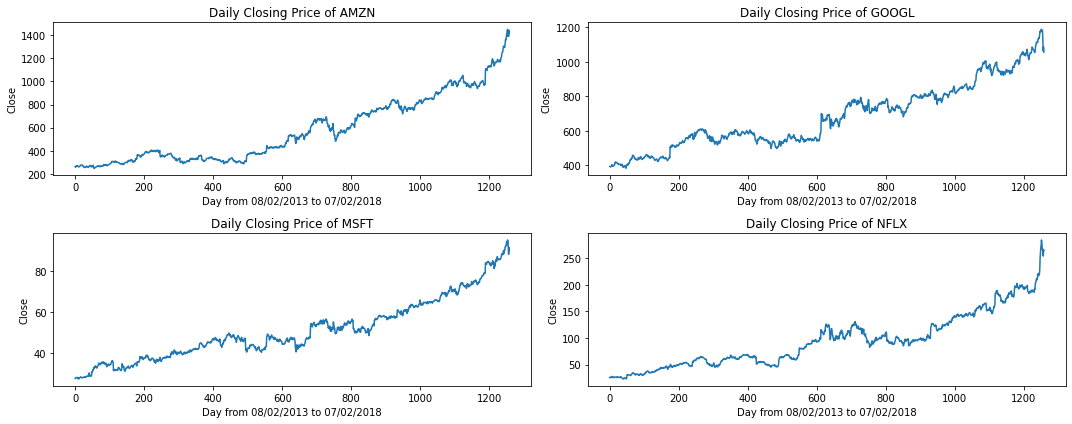

In [13]:
# Plotting the closing prices vs the day (08/02/2013 to 07/02/2018)
# since there are 1259 values for dates the x axis shows values in integers
plt.figure(figsize=(15, 6))

# For loop for plotting the data for all 4 stocks taken
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['close'].plot()
    # assigning labels and titles for graphs
    plt.ylabel('Close')
    plt.xlabel('Day from 08/02/2013 to 07/02/2018')
    plt.title(f"Daily Closing Price of {stock_list[i - 1]}")
    
plt.tight_layout()

## 2. Plotting Volume traded of stock over the period of time.

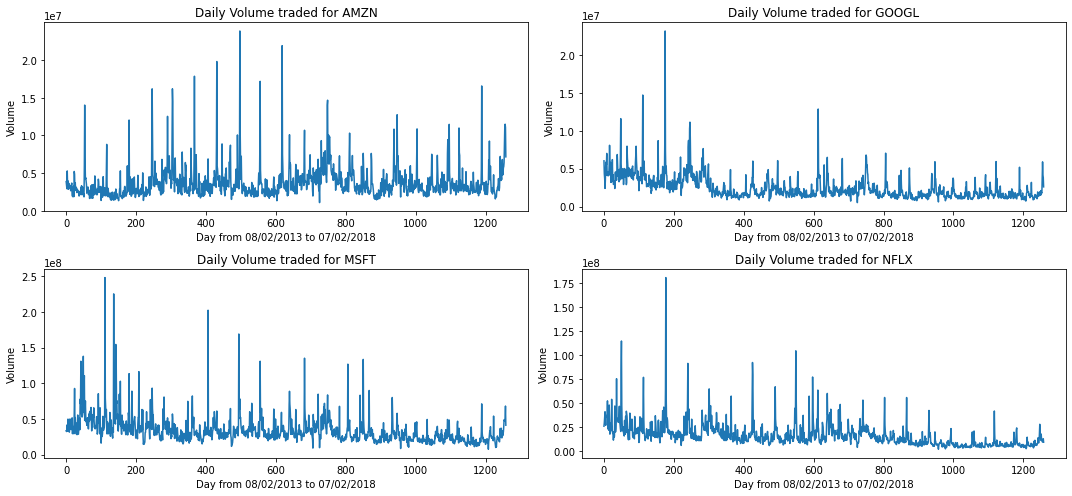

In [14]:
# Plotting volume traded vs the time 
plt.figure(figsize=(15, 7))

# For loop for plotting the data for all 4 stocks taken
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['volume'].plot()
    # assigning labels and titles for graphs
    plt.ylabel('Volume')
    plt.xlabel('Day from 08/02/2013 to 07/02/2018')
    plt.title(f"Daily Volume traded for {stock_list[i - 1]}")
    
plt.tight_layout()

## 3. Plotting Moving Averages for 3 different time frames

In [15]:
# making a list for different MA time frames
# We have taken 9, 14, 44 days
ma_day = [9, 14, 44]

for ma in ma_day:
    for company in company_list:
        # adding column for different MAs
        column_name = f"MA for {ma} days"
        # adding values to the columns of the MA for the respective time frame
        company[column_name] = company['close'].rolling(ma).mean()

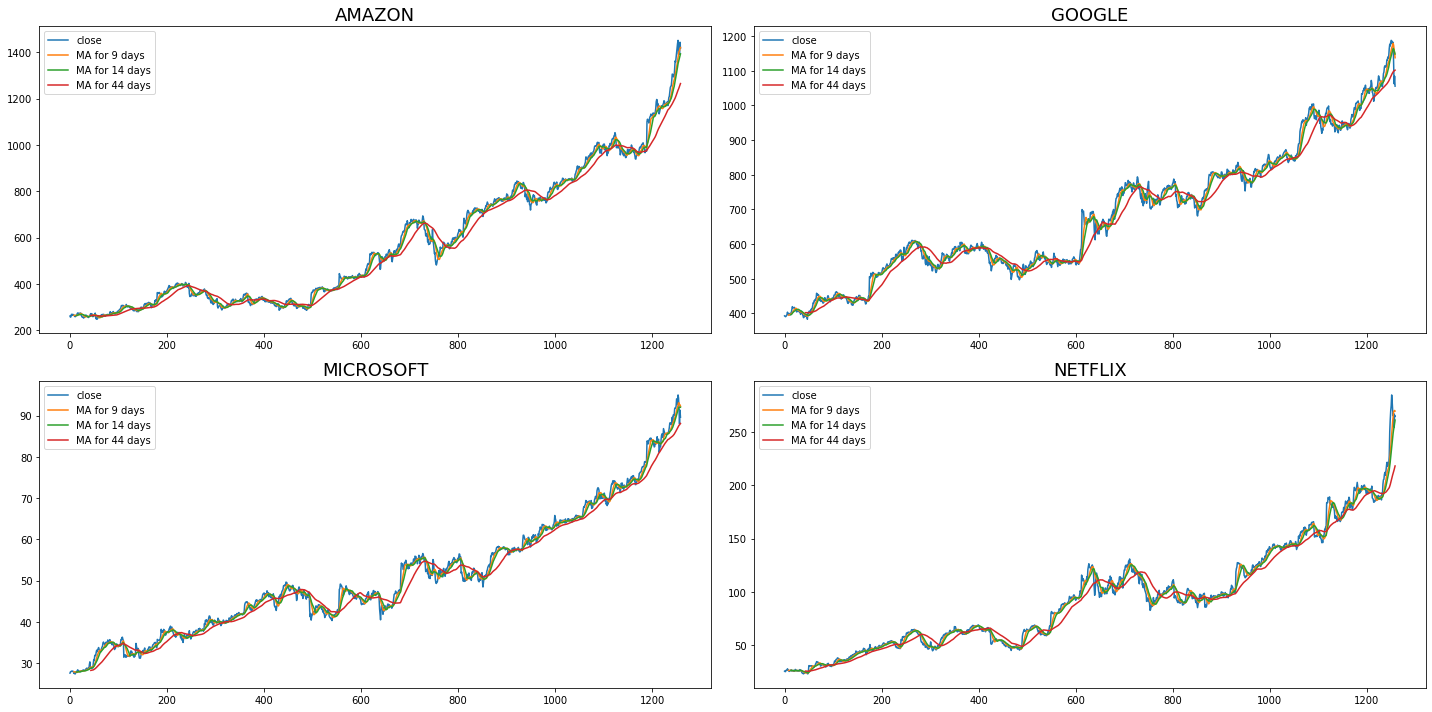

In [16]:
# plotting the All the MA and the closing price to the time as done above
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)

AMZN[['close', 'MA for 9 days', 'MA for 14 days', 'MA for 44 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AMAZON', fontsize=18)

GOOGL[['close', 'MA for 9 days', 'MA for 14 days', 'MA for 44 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE', fontsize=18)

MSFT[['close', 'MA for 9 days', 'MA for 14 days', 'MA for 44 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT', fontsize=18)

NFLX[['close', 'MA for 9 days', 'MA for 14 days', 'MA for 44 days']].plot(ax=axes[1,1])
axes[1,1].set_title('NETFLIX', fontsize=18)

fig.tight_layout()

## 4. Plotting Total Traded Value on a Day

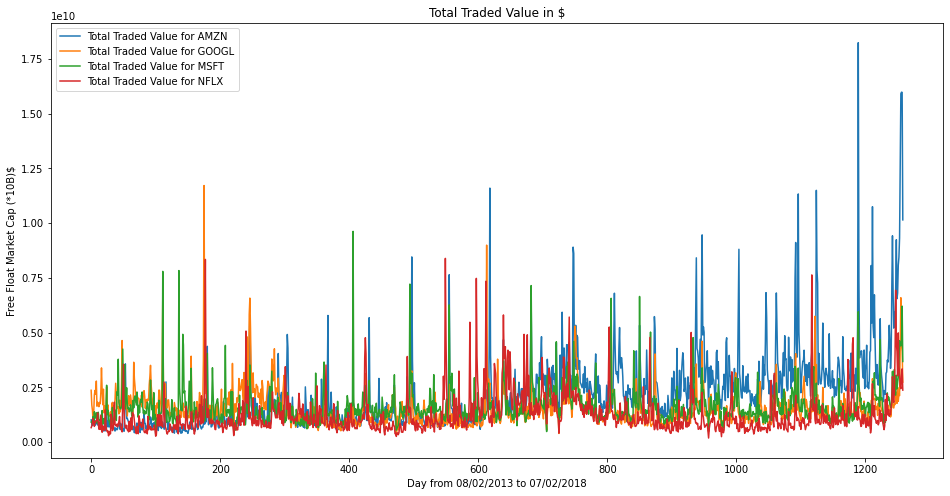

In [17]:
for company in company_list:
    company['Total Value'] = company['close'] * company['volume']
    company['Total Value'].plot(label = 'Total Traded Value for '+str(company['Name'].head()[0]), figsize = (16,8))

plt.xlabel('Day from 08/02/2013 to 07/02/2018')
plt.ylabel("Free Float Market Cap (*10B)$")
plt.title('Total Traded Value in $')
plt.legend()    

In [18]:
# We can see that even where there is difference in prices for these stocks they have nearly same traded value

## 5. Daily return of stock on average

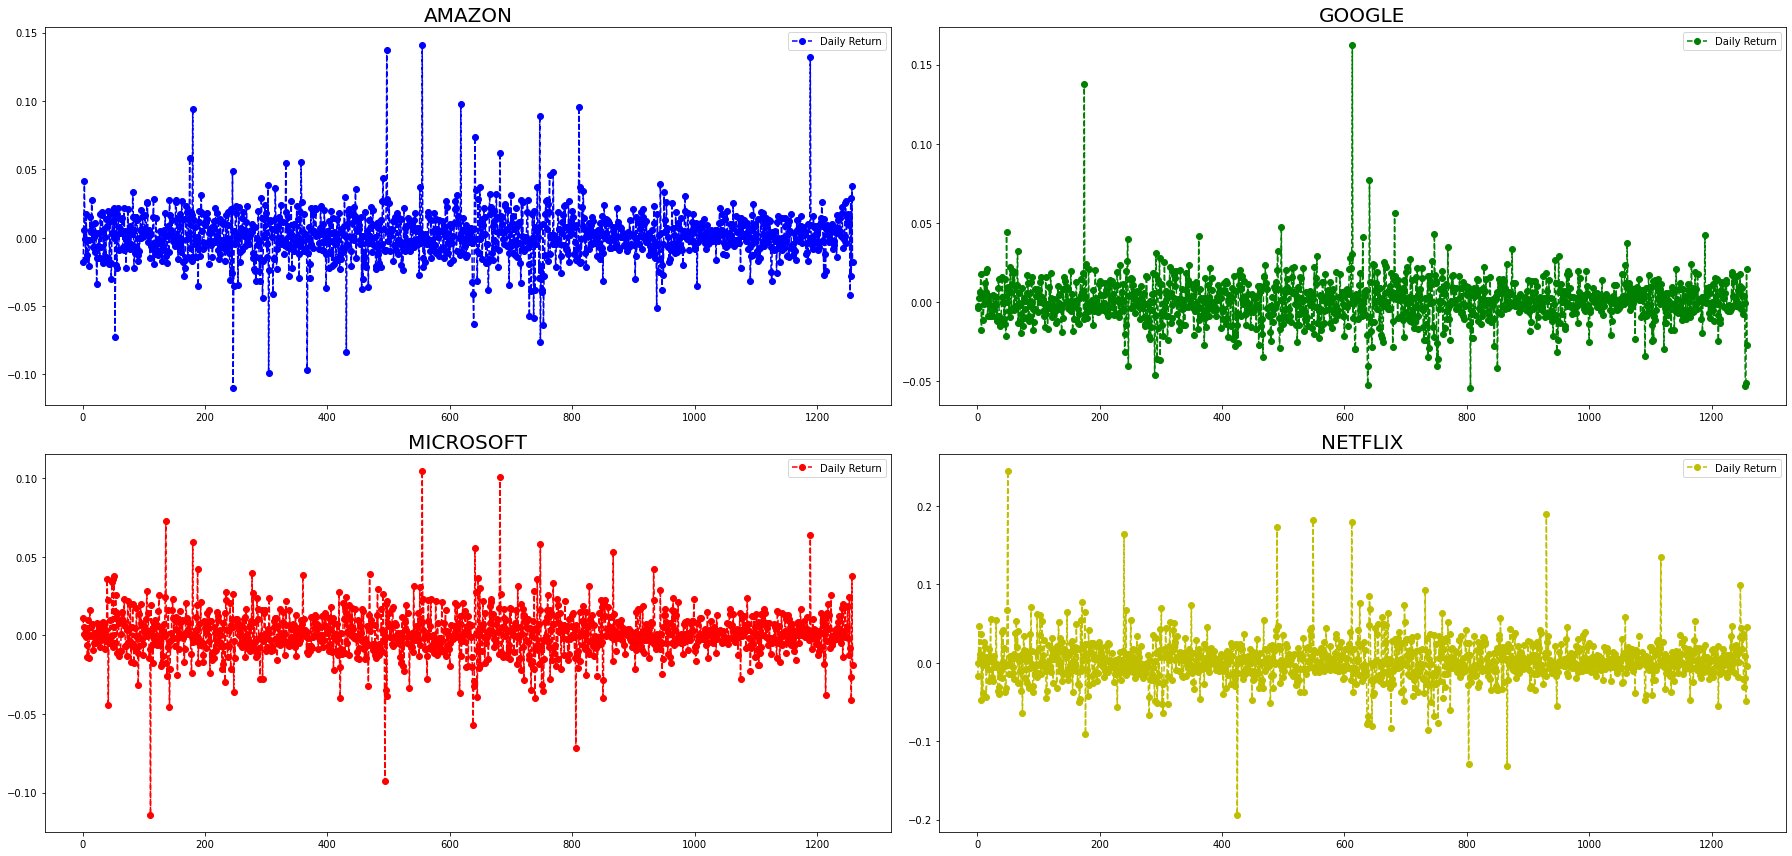

In [19]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(25)

AMZN['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o', color='b')
axes[0,0].set_title('AMAZON', fontsize=20)

GOOGL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o', color='g')
axes[0,1].set_title('GOOGLE', fontsize=20)

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o', color='r')
axes[1,0].set_title('MICROSOFT', fontsize=20)

NFLX['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o', color='y')
axes[1,1].set_title('NETFLIX', fontsize=20)

plt.tight_layout()

## 6. Correlation between different stocks closing prices

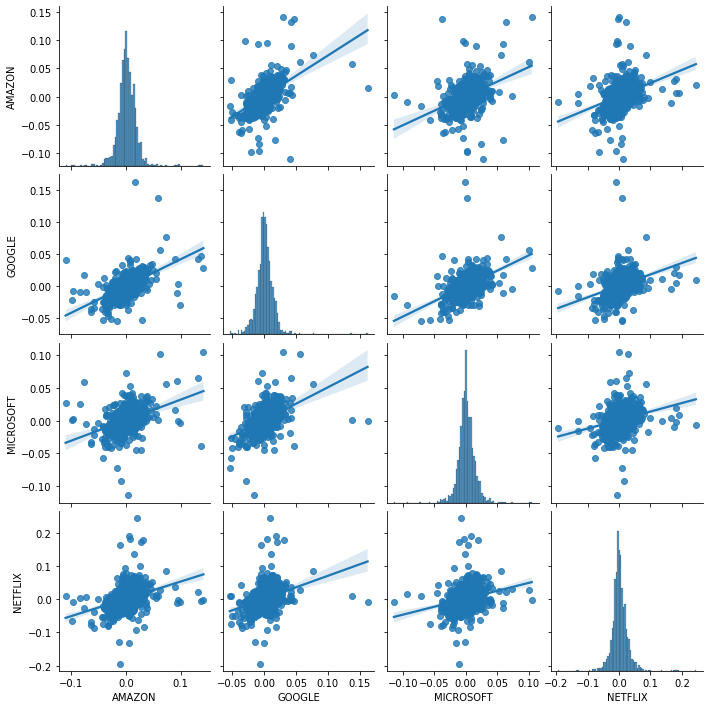

In [20]:
# importing seaborn for correaltion and heat map
import seaborn as sns

# scatter plots for comparing the change in % between the different stocks
# histogram plots for comparing the change in % between the same stocks
sns.pairplot(returns_df, kind='reg')

<AxesSubplot:>

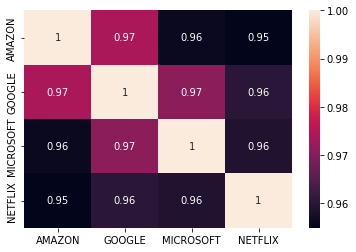

In [21]:
# heatmap for correlation between the prices change between the stocks 
sns.heatmap(closing_df.corr(), annot=True)

<AxesSubplot:>

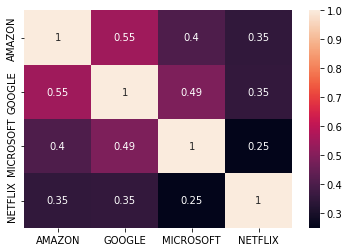

In [22]:
# heatmap for correlation between the daily returns between the stocks 
sns.heatmap(returns_df.corr(), annot=True)

# Prediction Model

### Pre-processing

In [23]:
# Here we take one stock for training and testing the prediction model 
# AMAZON
# create a data set with only close coloumn
close = AMZN.filter(['close'])
close.tail()

,close
1254,1390.00
1255,1429.95
1256,1390.00
1257,1442.84
1258,1416.78


Text(0, 0.5, 'Price $')

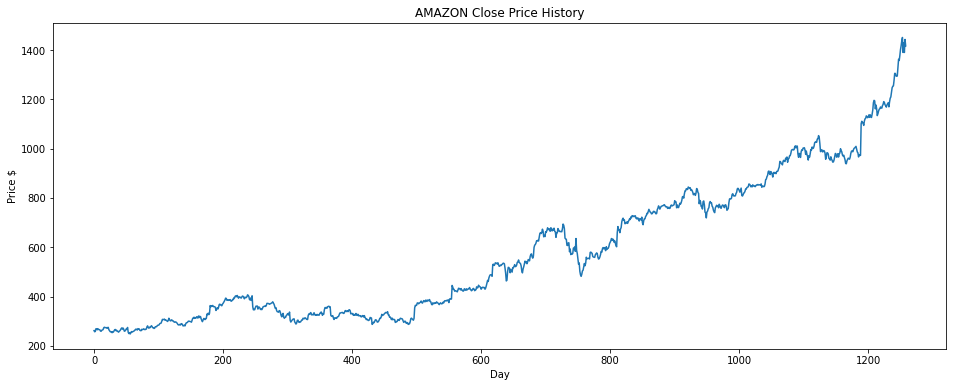

In [24]:
plt.figure(figsize=(16,6))
plt.title('AMAZON Close Price History')
plt.plot(close['close'])
plt.xlabel('Day')
plt.ylabel('Price $')

In [25]:
# convert the dataframe to a numpy array
close_np = close.values
# get number of rows to train the model
training_data_len = int(np.ceil(len(close_np) * 0.95))
training_data_len

1197

In [26]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(close_np)
scaled_close

array([[0.01140805],
       [0.00746678],
       [0.0087057 ],
       ...,
       [0.94937056],
       [0.9933065 ],
       [0.97163787]])

### Training Data

In [27]:
# Create the training data set from scaled set
train_data = scaled_close[0:training_data_len, :]
# split the training data set into x and y train 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert x_train and y_train data into NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.01140805, 0.00746678, 0.0087057 , 0.01766085, 0.01746961,
       0.01401892, 0.01789367, 0.01511649, 0.01472569, 0.01429332,
       0.00967855, 0.00925449, 0.01248898, 0.0133371 , 0.01455939,
       0.02068748, 0.02274957, 0.02125289, 0.02132772, 0.02158549,
       0.01913259, 0.0215356 , 0.02234214, 0.01455939, 0.01129995,
       0.0080322 , 0.00680159, 0.00752332, 0.00429049, 0.00791579,
       0.00647731, 0.0100444 , 0.01419354, 0.01518301, 0.01112534,
       0.01254885, 0.00898009, 0.00902167, 0.0060283 , 0.00891357,
       0.01073454, 0.01375285, 0.01797682, 0.02048792, 0.01620574,
       0.02004723, 0.01593967, 0.00930438, 0.01005272, 0.01273843,
       0.0171869 , 0.01708712, 0.02200955, 0.00547121, 0.00125555,
       0.00463972, 0.        , 0.00359204, 0.00816523, 0.00622786])]
[0.007899156868940521]

[array([0.01140805, 0.00746678, 0.0087057 , 0.01766085, 0.01746961,
       0.01401892, 0.01789367, 0.01511649, 0.01472569, 0.01429332,
       0.00967855, 0.00925449, 0.0

In [28]:
y_train.shape

(1137,)

In [29]:
# Creating a Stacked LSTM model 
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1137/1137 [==============================] - 17s 14ms/step - loss: 0.0013


In [30]:
# Create the testing data set
test_data = scaled_close[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = close_np[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to NumPy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [31]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

29.735626978546314

### Plotting Predictions

C:\Users\siddh\AppData\Local\Temp/ipykernel_9028/2918407223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


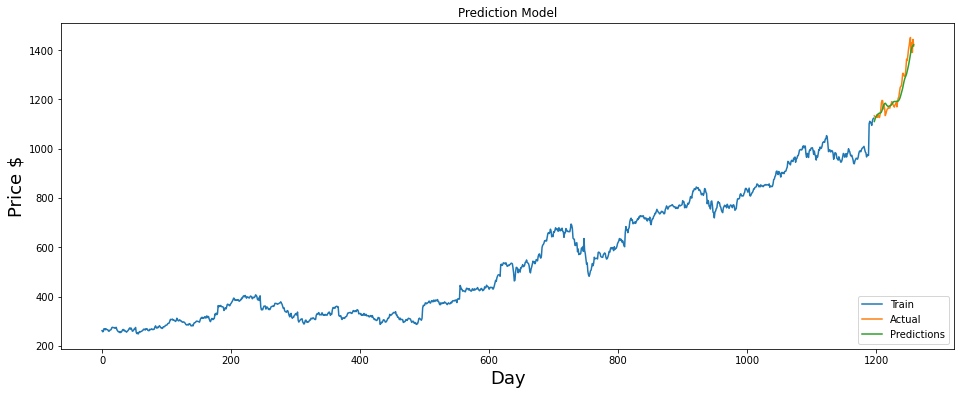

In [33]:
train = close[:training_data_len]
valid = close[training_data_len:]
# adding prediction coloumn to 'valid' dataset
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Prediction Model')
plt.xlabel('Day', fontsize=18)
plt.ylabel('Price $', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()